# Paradise Hotels Project

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is affecting the revenue for hotels. Such losses are particularly high on last-minute cancellations.


The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Paradise Hotels Group has a chain of hotels and they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.



**Data Dictionary**

* **no_of_adults**: Number of adults
* **no_of_children**: Number of Children
* **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan**: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* **lead_time**: Number of days between the date of booking and the arrival date
* **arrival_year**: Year of arrival date
* **arrival_month**: Month of arrival date
* **arrival_date**: Date of the month
* **market_segment_type**: Market segment designation.
* **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status**: Flag indicating if the booking was canceled or not.

In [ ]:
#Import packages

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics


# To get diferent metric scores
from sklearn.metrics import (confusion_matrix, classification_report)

## Import Dataset

In [3]:
# import the PH.csv file and store it in the dataframe 'hotel'
hotel = pd.read_csv(r"C:\Users\Priyanka\Downloads\PH.csv")
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10000,2,Canceled


In [ ]:
# copying data to another variable to avoid any changes to original data
df = hotel.copy()

### View the first and last 5 rows of the dataset

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10000,2,Canceled


In [ ]:
df.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
56921,2,1,0,1,Meal Plan 2,0,Room_Type 4,45,2019,6,15,Online,0,0,0,163.88000,1,Not_Canceled
56922,2,0,1,1,Meal Plan 1,0,Room_Type 1,320,2019,5,15,Offline,0,0,0,90.00000,1,Canceled
56923,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
56924,2,0,2,2,Not Selected,0,Room_Type 1,6,2019,4,28,Online,0,0,0,162.50000,2,Not_Canceled
56925,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Understand the shape of the dataset

In [ ]:
df.shape

(56926, 18)

### Check the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

In [ ]:
#checking for duplicate values
df.duplicated().sum()

14350

In [ ]:
# Drop all the duplicate values. Remove ______ and complete the code
df.drop_duplicates(inplace=True)


In [ ]:
#Creating numerical columns
num_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','required_car_parking_space','lead_time','arrival_month','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

#Creating categorical variables 
cat_cols= ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']

In [ ]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.00000,-0.04677,0.08845,0.11472,-0.01398,0.15759,0.08982,0.00177,0.00715,-0.24822,-0.08240,-0.15138,0.35285,0.11327
no_of_children,-0.04677,1.00000,0.01546,0.02240,0.01515,0.03651,0.01298,0.01372,0.01647,-0.04839,-0.02179,-0.02904,0.34486,0.06383
no_of_weekend_nights,0.08845,0.01546,1.00000,0.23458,-0.05414,0.11601,0.02595,0.00037,0.00018,-0.09607,-0.03646,-0.04882,0.00237,0.00619
no_of_week_nights,0.11472,0.02240,0.23458,1.00000,-0.06118,0.21000,0.04905,-0.00045,-0.01451,-0.12137,-0.03908,-0.05823,0.02476,0.02686
required_car_parking_space,-0.01398,0.01515,-0.05414,-0.06118,1.00000,-0.04607,-0.04609,0.00939,0.00063,0.12209,0.03557,0.07390,0.02660,0.06549
lead_time,0.15759,0.03651,0.11601,0.21000,-0.04607,1.00000,0.21063,0.10579,0.03672,-0.15493,-0.06056,-0.08877,0.00737,0.02454
arrival_year,0.08982,0.01298,0.02595,0.04905,-0.04609,0.21063,1.00000,-0.47112,-0.00305,-0.01534,-0.00548,0.01282,0.23925,0.03459
arrival_month,0.00177,0.01372,0.00037,-0.00045,0.00939,0.10579,-0.47112,1.00000,-0.00571,-0.00817,-0.02923,-0.00932,0.06588,0.06920
arrival_date,0.00715,0.01647,0.00018,-0.01451,0.00063,0.03672,-0.00305,-0.00571,1.00000,-0.01013,-0.00854,-0.00003,0.01659,-0.00154
repeated_guest,-0.24822,-0.04839,-0.09607,-0.12137,0.12209,-0.15493,-0.01534,-0.00817,-0.01013,1.00000,0.39743,0.55641,-0.20006,0.00210


## Exploratory Data Analysis

### Question: Check summary Statistics and analyze the variables. Also find the  Difference between the 25th quantile and 75th quantile value of 'average-price_per_room'

In [ ]:
#Remove __________ and complete the code

quantile_25 = df['avg_price_per_room'].quantile(0.25)
quantile_75 = df['avg_price_per_room'].quantile(0.75)
difference = quantile_75 - quantile_25
print("Difference between 25th and 75th quantile:", difference)



Difference between 25th and 75th quantile: 49.5


### Question: More than 90% of the type of room reserved by the customer are of which room type?

In [18]:
#Printing the % sub categories of each category 
# hint use value counts

#Remove __________ and complete the code
for i in cat_cols:
    print(df[i].value_counts(normalize=True) * 100)
    print('-' * 40)


#for i in cat_cols:
   # print(df[i].___________________)
   # print('-'*40)

Meal Plan 1    74.83794
Not Selected   20.47163
Meal Plan 2     4.67165
Meal Plan 3     0.01879
Name: type_of_meal_plan, dtype: float64
----------------------------------------
Room_Type 1   69.82807
Room_Type 4   22.00536
Room_Type 6    3.61706
Room_Type 5    2.12796
Room_Type 2    1.68640
Room_Type 7    0.72106
Room_Type 3    0.01409
Name: room_type_reserved, dtype: float64
----------------------------------------
Online          80.25413
Offline         13.56868
Corporate        4.55421
Complementary    1.16498
Aviation         0.45800
Name: market_segment_type, dtype: float64
----------------------------------------
Not_Canceled   65.97379
Canceled       34.02621
Name: booking_status, dtype: float64
----------------------------------------


In [19]:
#Let's encode Canceled bookings to 1 and Not_Canceled as 0
df = df.replace({'booking_status':{'Not_Canceled':0,  'Canceled':1}})

In [ ]:
#verify
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10000,2,1


### Question: Find correlation between different variables

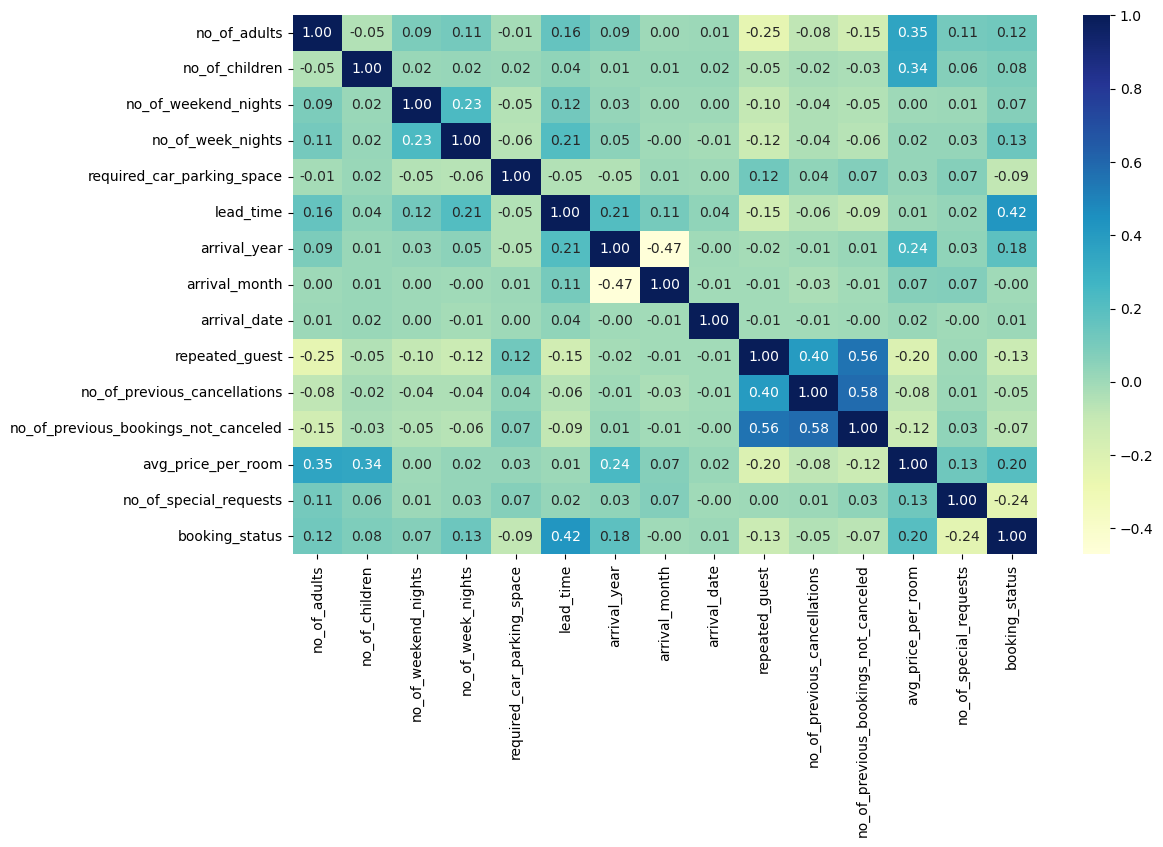

In [21]:
#Remove __________ and complete the code
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='YlGnBu')
plt.show()




### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29803, 27)
Shape of test set :  (12773, 27)
Percentage of classes in training set:
0   0.66107
1   0.33893
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.65662
1   0.34338
Name: booking_status, dtype: float64


### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

In [24]:
#using this function will generate all the metrics and confusion score
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression (with Sklearn library)

### Question: Build the logistic regression model use random_state =1 and check its performance on train and test dataset

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression model
log_reg = LogisticRegression(random_state=1)

# Fit the logistic regression model
log_reg.fit(X_train, y_train)

# Predict on the training set
train_preds = log_reg.predict(X_train)

# Predict on the test set
test_preds = log_reg.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, train_preds)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.7861960205348455
Test Accuracy: 0.7843106552884992


              precision    recall  f1-score   support

           0       0.81      0.89      0.85     19702
           1       0.73      0.59      0.65     10101

    accuracy                           0.79     29803
   macro avg       0.77      0.74      0.75     29803
weighted avg       0.78      0.79      0.78     29803



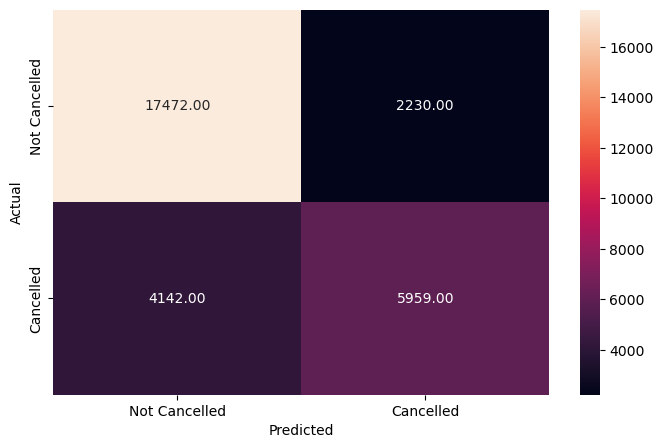

In [26]:
# predicting on training set
#Remove __________ and complete the code

y_pred_train = log_reg.predict(X_train)


metrics_score(y_train, y_pred_train)

#### Checking performance on test set

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      8387
           1       0.73      0.59      0.65      4386

    accuracy                           0.78     12773
   macro avg       0.77      0.74      0.75     12773
weighted avg       0.78      0.78      0.78     12773



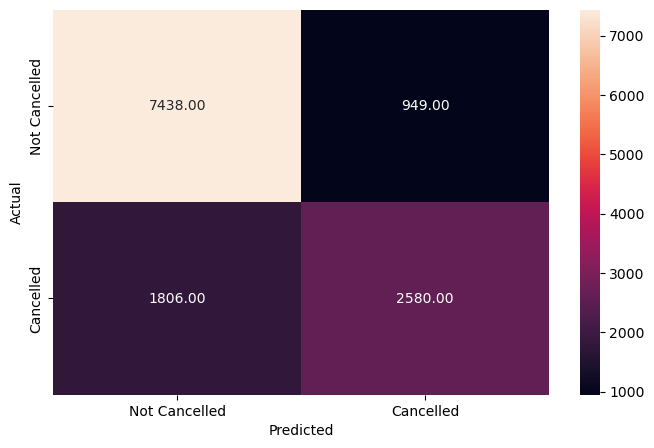

In [27]:
# predicting on the test set

#Remove __________ and complete the code
y_pred_test = log_reg.predict(X_test)

metrics_score(y_test, y_pred_test)

### Question: Building SVM and checking its performance

In [28]:
#define the SVM model
#Remove __________ and complete the code
from sklearn.svm import SVC

# Define the SVM model with a linear kernel
svm = SVC(kernel='linear')

# Fit the SVM model
svm.fit(X=X_train, y=y_train)




SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     19702
           1       0.72      0.63      0.67     10101

    accuracy                           0.79     29803
   macro avg       0.77      0.75      0.76     29803
weighted avg       0.79      0.79      0.79     29803



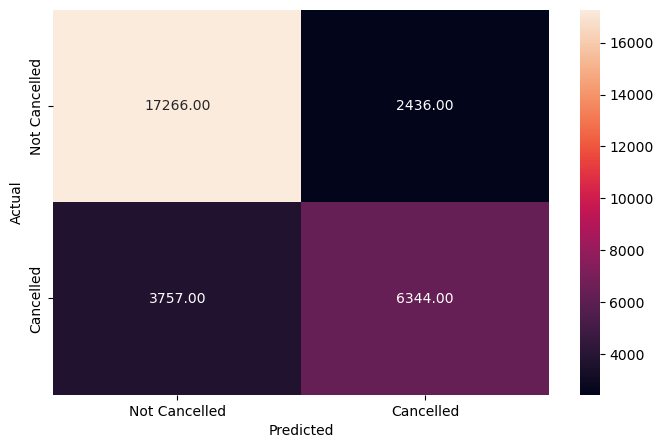

In [33]:
# predicting on training set
#Remove __________ and complete the code

y_pred_train_svm = svm.predict(X_train)
metrics_score( y_train,y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      8387
           1       0.72      0.63      0.67      4386

    accuracy                           0.79     12773
   macro avg       0.77      0.75      0.76     12773
weighted avg       0.79      0.79      0.79     12773



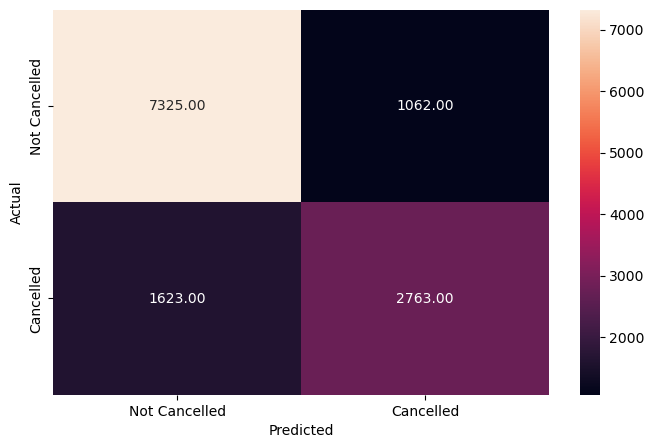

In [34]:
# predicting on testing set
#Remove __________ and complete the code
y_pred_test_svm = svm.predict(X_test)

metrics_score(y_test,y_pred_test_svm)